# 1.定义问题

## a）导入库类

In [1]:
import numpy as np
from numpy import arange
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

## b）导入数据集

In [2]:
file = r'E:\machine_learning\DATA\boston-house-prices\housing.csv'
names = ['CRIM', 'ZN', 'INDUS',
         'CHAS', 'NOX', 'RM',
         'AGE', 'DIS', 'RAD',
         'TAX', 'PRTATIO', 'B',
         'LSTAT', 'MEDV'
         ]

In [3]:
data=read_csv(file,names=names,delim_whitespace=True)

# 2.理解数据

## a）描述性统计

In [4]:
print(data.shape)
print(data.dtypes)

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PRTATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [5]:
set_option('display.width',120)
print(data.head(30))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  PRTATIO       B  LSTAT  MEDV
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0     18.7  394.63   2.94  33.4
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0     18.7  396.90   5.33  36.2
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0     18.7  394.12   5.21  28.7
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0     15.2  395.60  12.43  22.9
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0     15.2  396.90  19.15  27.1
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0     15.2  

In [6]:
set_option('precision',1)
print(data.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD    TAX  PRTATIO      B  LSTAT   MEDV
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0  506.0    506.0  506.0  506.0  506.0
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5  408.2     18.5  356.7   12.7   22.5
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7  168.5      2.2   91.3    7.1    9.2
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0  187.0     12.6    0.3    1.7    5.0
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0  279.0     17.4  375.4    6.9   17.0
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0  330.0     19.1  391.4   11.4   21.2
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0  666.0     20.2  396.2   17.0   25.0
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0  711.0     22.0  396.9   38.0   50.0


In [7]:
set_option('precision',2)
print(data.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  PRTATIO     B  LSTAT  MEDV
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58     0.29 -0.39   0.46 -0.39
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31    -0.39  0.18  -0.41  0.36
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72     0.38 -0.36   0.60 -0.48
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04    -0.12  0.05  -0.05  0.18
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67     0.19 -0.38   0.59 -0.43
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29    -0.36  0.13  -0.61  0.70
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51     0.26 -0.27   0.60 -0.38
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53    -0.23  0.29  -0.50  0.25
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 

## b）数据可视化

### 单一特征属性

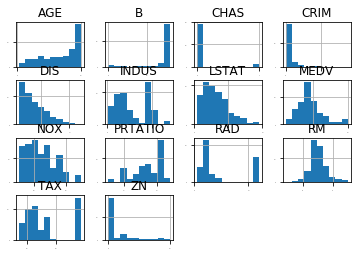

In [8]:
data.hist(xlabelsize=1,ylabelsize=1)
plt.show()

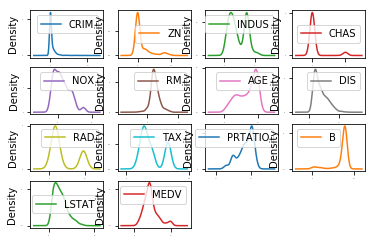

In [9]:
data.plot(kind='density',subplots=True,layout=(4,4),sharex=False,fontsize=1)
plt.show()

这是上面直方图的密度曲线图

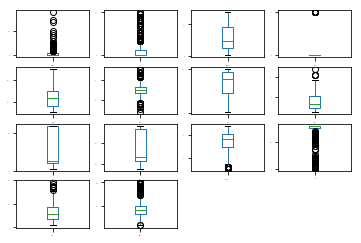

In [10]:
data.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,fontsize=1)
plt.show()

### 特征之间

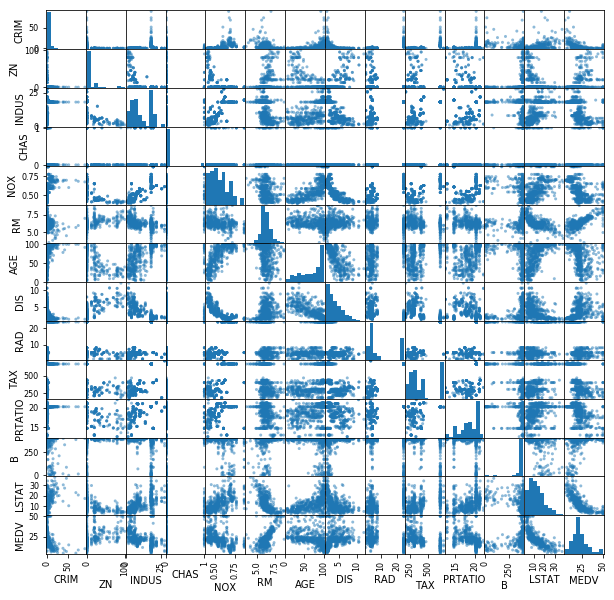

In [11]:
scatter_matrix(data,figsize=(10,10))
plt.show()

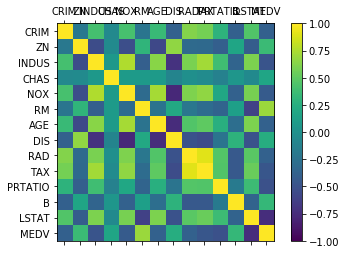

In [12]:
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(data.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
ticks=np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# 3.数据准备

In [13]:
from numpy import set_printoptions
set_printoptions(precision=3)

In [4]:
array=data.values
X=array[:,:-1]
Y=array[:,-1]

## a）数据清洗

## b）特征选择

### 标准化数据降低不同数据度量单位带来的影响

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
transformer=MinMaxScaler(feature_range=(0,1))
newX=transformer.fit_transform(X)

### 减少相关性强的特征

In [25]:
from sklearn.feature_selection import SelectKBest, chi2

In [26]:
test=SelectKBest(score_func=chi2,k='all')
fit=test.fit(newX,Y.astype('int'))
#X要非负！

In [27]:
fit.scores_
#5,10,11,13

array([ 30.136,  41.426,  29.756,  49.865,   3.252,  20.369,  26.118,
       181.643, 101.459,  10.59 ,  12.557,  28.002,  12.642])

In [41]:
features=fit.transform(newX)
features

array([[0.068, 0.315, 0.   , 0.208],
       [0.242, 0.173, 0.043, 0.105],
       [0.242, 0.173, 0.043, 0.105],
       ...,
       [0.42 , 0.387, 0.   , 0.164],
       [0.42 , 0.387, 0.   , 0.164],
       [0.42 , 0.387, 0.   , 0.164]])

In [40]:
test=SelectKBest(score_func=chi2,k=4)
fit=test.fit(newX,Y.astype('int'))
#X要非负！

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [42]:
solver='liblinear'
clf=LogisticRegression(solver='liblinear',multi_class='auto')
rfe=RFE(clf,4)
fit=rfe.fit(newX,Y.astype('int'))

In [43]:
'特征个数：'
fit.n_features_

4

In [44]:
'被选定的特征：'
fit.support_
#5,6,8,11

array([False, False, False, False,  True,  True, False,  True, False,
       False,  True, False, False])

In [33]:
'特征排名：'
fit.ranking_

array([10,  7, 11,  6,  1,  2,  3,  1,  9,  4,  1,  8,  5])

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
clf=ExtraTreesClassifier(n_estimators=10)

In [36]:
fit=clf.fit(newX,Y.astype('int'))

In [37]:
fit.feature_importances_

array([0.009, 0.111, 0.014, 0.108, 0.084, 0.083, 0.095, 0.095, 0.068,
       0.048, 0.099, 0.095, 0.093])

In [38]:
fit=clf.fit(X,Y.astype('int'))

In [39]:
fit.feature_importances_
#4,7,8,11

array([0.014, 0.043, 0.014, 0.102, 0.09 , 0.088, 0.11 , 0.155, 0.071,
       0.053, 0.091, 0.089, 0.079])

# 4.评估算法

## a）分离数据集

In [5]:
validation_size=0.2
seed=2

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

## b）定义模型评估标准

### 利用原始数据进行审查

In [21]:
models={}
models['LR']=LinearRegression()
models['LASSO']=Lasso()
models['EN']=ElasticNet()
models['KNN']=KNeighborsRegressor()
models['CART']=DecisionTreeRegressor()
models['SVM']=SVR(gamma='auto')


In [7]:
num_folds=10
seed=7
scoring='neg_mean_squared_error'

In [8]:
kfold=KFold(n_splits=num_folds,
            random_state=seed,
            )

In [24]:
results=[]
for name in models:
    cv_result=cross_val_score(models[name],
                              X_train,
                              Y_train,
                              cv=kfold,
                              scoring=scoring,
                              )
    results.append(cv_result)
    msg='%s: %f (%f)'%(name, cv_result.mean(),cv_result.std())
    print(msg)


LR: -24.657703 (9.239461)
LASSO: -29.503909 (9.682357)
EN: -28.808325 (9.203133)
KNN: -41.405298 (9.375431)
CART: -22.475213 (12.577943)
SVM: -84.419517 (31.265001)


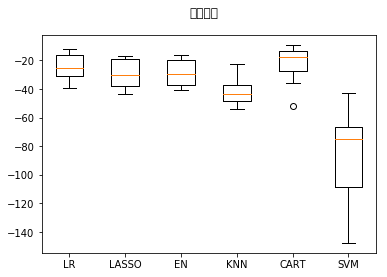

In [25]:
fig=plt.figure()
fig.suptitle('算法比较')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

### 利用正态化数据评估算法    KNN、SVM影响较大

In [26]:
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])
pipelines['ScalerLASSO'] = Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])
pipelines['ScalerEN'] = Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVR())])

In [27]:
results = []
for name in pipelines:
    cv_result = cross_val_score(pipelines[name],
                                X_train,
                                Y_train,
                                cv=kfold,
                                scoring=scoring,
                                )
    results.append(cv_result)
    msg = '%s: %f (%f)' % (name, cv_result.mean(), cv_result.std())
    print(msg)

ScalerLR: -24.657703 (9.239461)
ScalerLASSO: -30.614413 (12.032748)
ScalerEN: -32.019121 (13.245473)
ScalerKNN: -25.015972 (11.419663)
ScalerCART: -21.921083 (12.296122)
ScalerSVM: -33.898479 (16.617995)


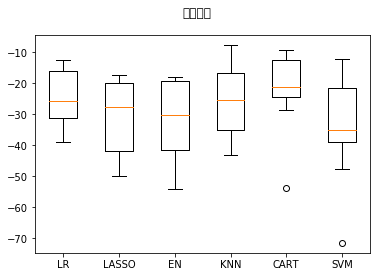

In [28]:
fig=plt.figure()
fig.suptitle('算法比较')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

### 调参

In [21]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
param_grid={'n_neighbors':[1,3,5,7,9,10,11,13,15,17,19]}
model=KNeighborsRegressor()
grid=GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring=scoring,
                  cv=kfold,
                  iid=False,
                  )
grid_result=grid.fit(X=rescaledX,y=Y_train)

print('最优：%s 使用%s'%(grid_result.best_score_,grid_result.best_params_))
cv_results=zip(grid_result.cv_results_['mean_test_score'],
              grid_result.cv_results_['std_test_score'],
              grid_result.cv_results_['params']
              )
for mean,std,param in cv_results:
    print('%f (%f) with %r'%(mean,std,param))


最优：-21.446613075880755 使用{'n_neighbors': 3}
-26.633781 (18.512042) with {'n_neighbors': 1}
-21.446613 (10.868336) with {'n_neighbors': 3}
-25.093846 (11.422035) with {'n_neighbors': 5}
-22.805506 (10.361262) with {'n_neighbors': 7}
-23.350794 (11.171347) with {'n_neighbors': 9}
-23.518522 (10.766725) with {'n_neighbors': 10}
-23.750554 (11.077094) with {'n_neighbors': 11}
-24.397469 (11.024460) with {'n_neighbors': 13}
-24.937831 (10.706645) with {'n_neighbors': 15}
-25.882435 (11.059612) with {'n_neighbors': 17}
-26.754537 (11.046617) with {'n_neighbors': 19}


### 集成

In [13]:
ensembles={}
ensembles['ScaledAB']=Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])
ensembles['ScaledAB-KNN']=Pipeline([('Scaler', StandardScaler()),
                                    ('AB-KNN', AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3)))
                                    ])
ensembles['ScaledAB-LR']=Pipeline([('Scaler', StandardScaler()), ('AB-LR', AdaBoostRegressor(LinearRegression()))])
ensembles['ScaledRFE']=Pipeline([('Scaler', StandardScaler()), ('RFE', RandomForestRegressor(n_estimators=100))])
ensembles['ScaledETR']=Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesRegressor(n_estimators=100))])
ensembles['ScaledGBR']=Pipeline([('Scaler', StandardScaler()), ('GBR', GradientBoostingRegressor())])

In [14]:
results=[]
for name in ensembles:
    cv_result = cross_val_score(ensembles[name],
                                X_train,
                                Y_train,
                                cv=kfold,
                                scoring=scoring,
                                )
    results.append(cv_result)
    msg = '%s: %f (%f)' % (name, cv_result.mean(), cv_result.std())
    print(msg)

ScaledAB: -14.819748 (5.954945)
ScaledAB-KNN: -21.457094 (16.634270)
ScaledAB-LR: -28.356348 (9.533910)
ScaledRFE: -10.831143 (4.721880)
ScaledETR: -10.077104 (4.837537)
ScaledGBR: -9.318206 (3.964252)


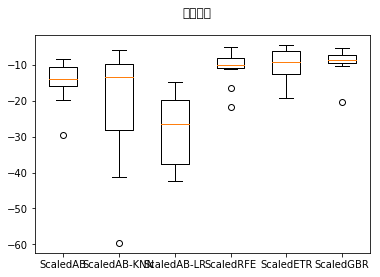

In [15]:
fig = plt.figure()
fig.suptitle('算法比较')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())
plt.show()

### 集成调参

#### GBM调参

In [20]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
param_grid={'n_estimators':[10,50,100,200,300,400,500,600,700,800,900]}
model=GradientBoostingRegressor()
grid=GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring=scoring,
                  cv=kfold,
                  iid=False,
                  )
grid_result=grid.fit(X=rescaledX,y=Y_train)

print('最优：%s 使用%s'%(grid_result.best_score_,grid_result.best_params_))

最优：-9.220048683064821 使用{'n_estimators': 200}


In [19]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
param_grid={'n_estimators':[5,10,20,30,40,50,60,70,80,90,100]}
model=ExtraTreesRegressor()
grid=GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring=scoring,
                  cv=kfold,
                  iid=False,
                  )
grid_result=grid.fit(X=rescaledX,y=Y_train)

print('最优：%s 使用%s'%(grid_result.best_score_,grid_result.best_params_))

最优：-9.512737040876237 使用{'n_estimators': 90}
